#PROBLEM STATEMENT
Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.
The specific problem to be addressed in this project is 'Content Trends Analysis for Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.


# Task
Analyze the Netflix content distribution by type, genre, and country over the years to identify content trends and provide strategic recommendations. Use the dataset "netflix_titles.csv".

## Load the dataset

### Subtask:
Load the Netflix dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a pandas DataFrame.



In [14]:
df = pd.read_csv('/content/Netflix Dataset.csv')
display(df.head())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Explore the data

### Subtask:
Display the first few rows, the columns and their data types, and check for missing values.


**Reasoning**:
Display the first few rows, the columns and their data types, and check for missing values as requested by the instructions.



In [3]:
display(df.head())
df.info()
display(df.isnull().sum())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


## Analyze content types

### Subtask:
Determine the distribution of movies and TV shows in the dataset and visualize the results.


**Reasoning**:
Count the occurrences of each category in the 'Category' column and then create a bar plot to visualize these counts, labeling the axes and adding a title as requested.



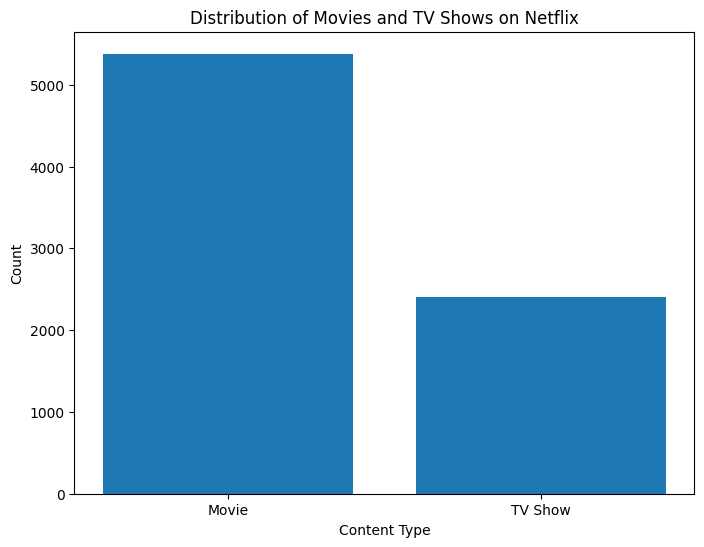

In [5]:
import matplotlib.pyplot as plt

category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.show()

## Analyze content by genre

### Subtask:
Identify the most popular genres for both movies and TV shows and visualize the results.


**Reasoning**:
Filter the DataFrame into movies and TV shows, extract and count genres for each, select the top genres, and create bar plots for visualization.



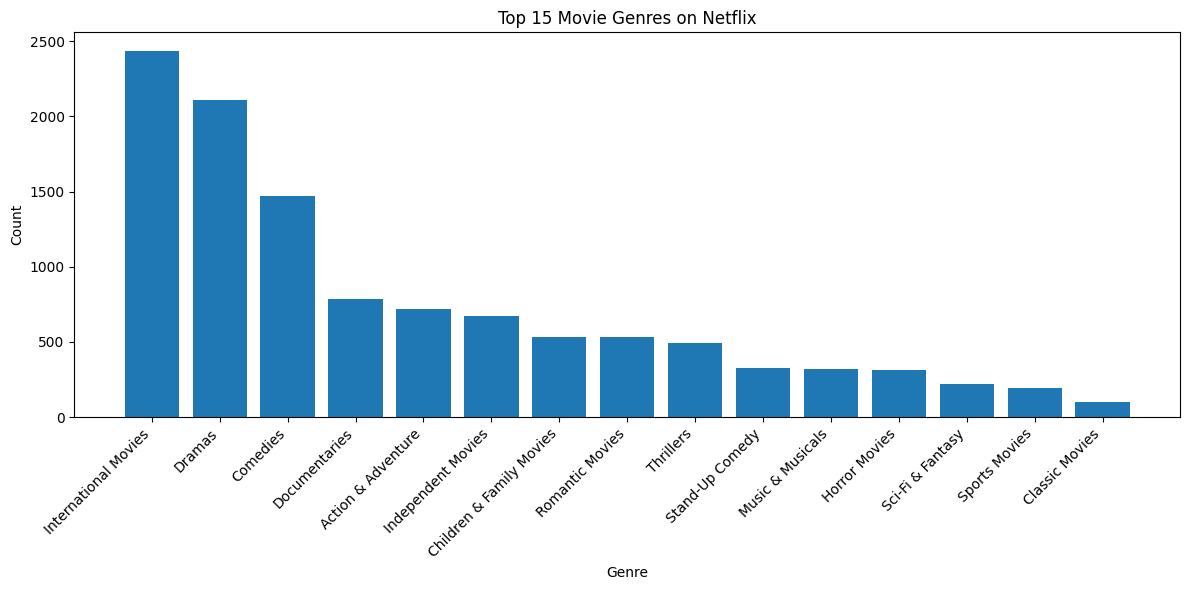

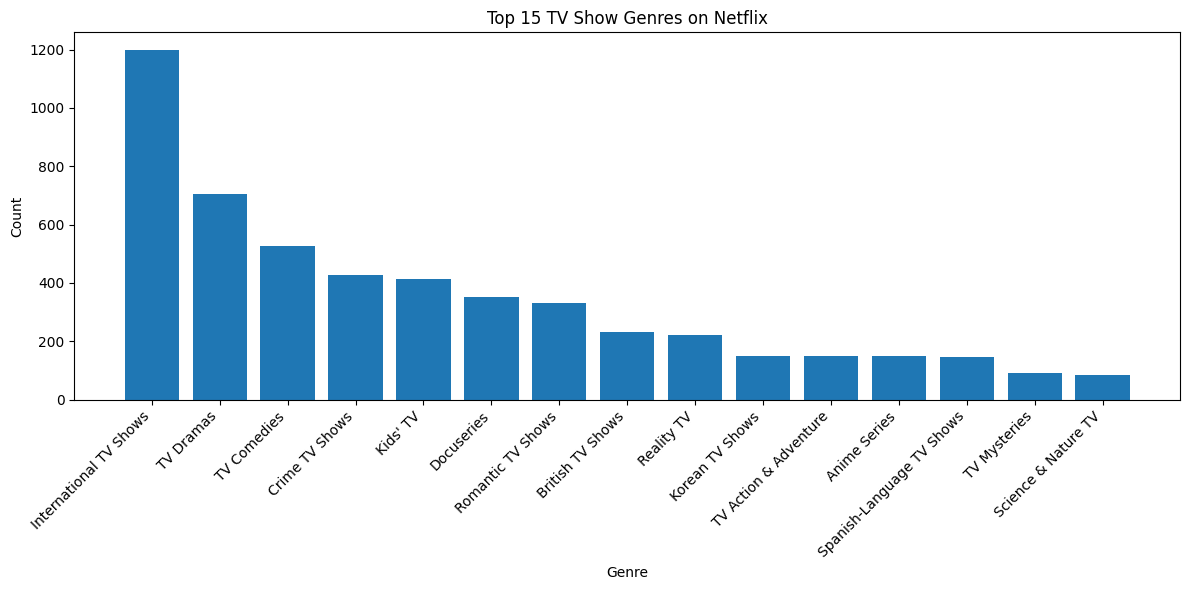

In [6]:
movies_df = df[df['Category'] == 'Movie'].copy()
tv_shows_df = df[df['Category'] == 'TV Show'].copy()

def count_genres(dataframe):
    genres = {}
    for index, row in dataframe.iterrows():
        if pd.notna(row['Type']):
            for genre in [g.strip() for g in row['Type'].split(',')]:
                genres[genre] = genres.get(genre, 0) + 1
    return pd.Series(genres).sort_values(ascending=False)

movie_genres = count_genres(movies_df)
tv_show_genres = count_genres(tv_shows_df)

top_n = 15
top_movie_genres = movie_genres.head(top_n)
top_tv_show_genres = tv_show_genres.head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_movie_genres.index, top_movie_genres.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title(f'Top {top_n} Movie Genres on Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(top_tv_show_genres.index, top_tv_show_genres.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title(f'Top {top_n} TV Show Genres on Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze content by country

### Subtask:
Determine which countries produce the most content on Netflix and visualize the results.


**Reasoning**:
Define a function to count content by country, handle missing values and comma-separated strings, then apply it to the dataframe, select the top 15 countries, and visualize the results with a bar plot.



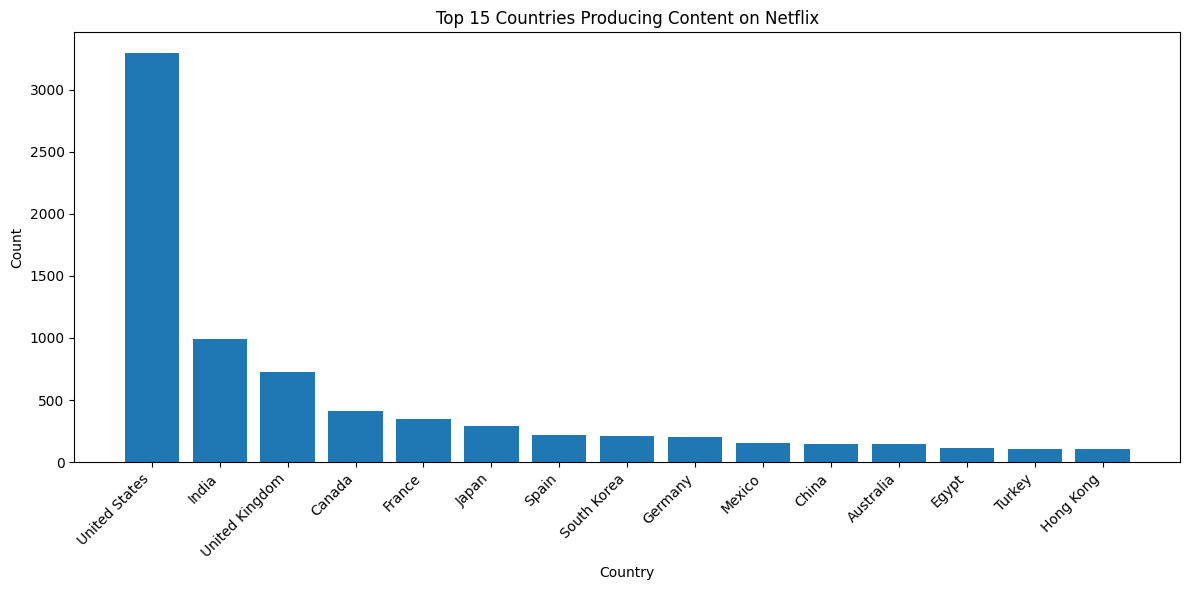

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def count_countries(dataframe):
    countries = {}
    for index, row in dataframe.iterrows():
        if pd.notna(row['Country']):
            for country in [c.strip() for c in row['Country'].split(',')]:
                countries[country] = countries.get(country, 0) + 1
    return pd.Series(countries).sort_values(ascending=False)

country_counts = count_countries(df)

top_n = 15
top_countries = country_counts.head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title(f'Top {top_n} Countries Producing Content on Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze content over time

### Subtask:
Explore how the number of movies and TV shows added to Netflix has changed over the years.


**Reasoning**:
Convert 'Release_Date' to datetime, extract the year, group by year and category, count entries, filter out 2024, and plot the results to visualize content added over time.



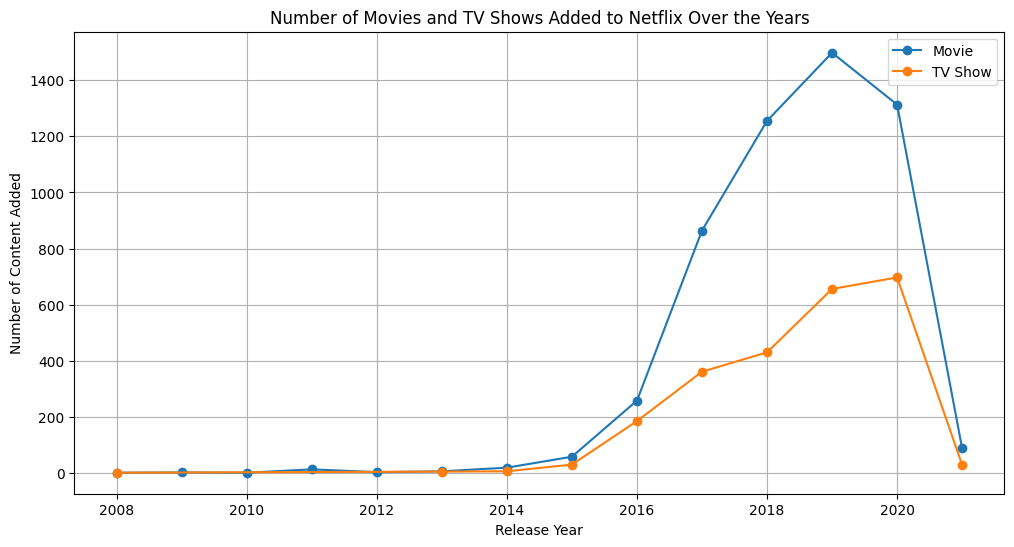

In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed')
df['Release_Year'] = df['Release_Date'].dt.year

content_over_time = df.groupby(['Release_Year', 'Category']).size().reset_index(name='Count')

content_over_time_filtered = content_over_time[content_over_time['Release_Year'] != 2024]

plt.figure(figsize=(12, 6))
for category in content_over_time_filtered['Category'].unique():
    subset = content_over_time_filtered[content_over_time_filtered['Category'] == category]
    plt.plot(subset['Release_Year'], subset['Count'], marker='o', label=category)

plt.xlabel('Release Year')
plt.ylabel('Number of Content Added')
plt.title('Number of Movies and TV Shows Added to Netflix Over the Years')
plt.legend()
plt.grid(True)
plt.show()

## Summarize findings

### Subtask:
Provide a summary of the key content trends observed in the analysis.


**Reasoning**:
Review the analysis results and synthesize them into a summary of key content trends.



In [11]:
print(category_counts.index)

Index(['Movie', 'TV Show'], dtype='object', name='Category')


**Reasoning**:
The index of `category_counts` is indeed `['Movie', 'TV Show']`. The KeyError in the previous attempt was caused by including extra single quotes around 'Movie' in the f-string within the summary text. I will regenerate the summary, correcting the formatting to access the series elements directly using the correct string keys.



In [13]:
print("Category Counts:")
print(category_counts)
print("\nTop Movie Genres:")
print(top_movie_genres.to_dict())
print("\nTop TV Show Genres:")
print(top_tv_show_genres.to_dict())
print("\nTop Countries:")
print(top_countries.to_dict())

summary = """
Key Content Trends on Netflix:

1.  **Dominant Content Type:** Movies constitute the majority of the content on Netflix, significantly outnumbering TV shows.
    - Based on category counts: {category_counts}

2.  **Most Prevalent Genres:**
    - **Movies:** The analysis of movie genres revealed that International Movies, Dramas, and Comedies are the most prevalent genres.
    - Based on top movie genres: {top_movie_genres_dict}
    - **TV Shows:** For TV shows, International TV Shows, TV Dramas, and TV Comedies are the most popular genres.
    - Based on top tv show genres: {top_tv_show_genres_dict}

3.  **Leading Countries in Content Production:** The United States is the leading country in terms of content production on Netflix by a significant margin, followed by India and the United Kingdom.
    - Based on top countries: {top_countries_dict}

4.  **Content Volume Over Time:** The number of both movies and TV shows added to Netflix has shown a general upward trend over the years, with a notable increase in recent years (prior to 2021, which shows a drop, likely due to data cut-off). There was a significant peak in content added around 2019-2020.
    - Based on the content over time filtered DataFrame and the generated plot.

**Interesting Observations:**

*   While the US dominates in overall content production, the prevalence of "International Movies" and "International TV Shows" as top genres highlights Netflix's global focus and the diversity of content on the platform.
*   The sharp increase in content added around 2019-2020 suggests a period of aggressive content acquisition or production by Netflix. The subsequent drop in 2021 might be due to the dataset's cutoff date or external factors.
"""

print(summary.format(category_counts=category_counts,
                     top_movie_genres_dict=top_movie_genres.to_dict(),
                     top_tv_show_genres_dict=top_tv_show_genres.to_dict(),
                     top_countries_dict=top_countries.to_dict()))

Category Counts:
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Top Movie Genres:
{'International Movies': 2437, 'Dramas': 2108, 'Comedies': 1472, 'Documentaries': 786, 'Action & Adventure': 721, 'Independent Movies': 675, 'Children & Family Movies': 532, 'Romantic Movies': 531, 'Thrillers': 492, 'Stand-Up Comedy': 329, 'Music & Musicals': 321, 'Horror Movies': 312, 'Sci-Fi & Fantasy': 218, 'Sports Movies': 196, 'Classic Movies': 103}

Top TV Show Genres:
{'International TV Shows': 1199, 'TV Dramas': 704, 'TV Comedies': 525, 'Crime TV Shows': 427, "Kids' TV": 414, 'Docuseries': 353, 'Romantic TV Shows': 333, 'British TV Shows': 232, 'Reality TV': 222, 'Korean TV Shows': 150, 'TV Action & Adventure': 150, 'Anime Series': 148, 'Spanish-Language TV Shows': 147, 'TV Mysteries': 90, 'Science & Nature TV': 85}

Top Countries:
{'United States': 3298, 'India': 990, 'United Kingdom': 723, 'Canada': 412, 'France': 349, 'Japan': 287, 'Spain': 215, 'South Korea': 212, 'Germany

## Strategic Recommendations

Based on the analysis of Netflix content trends, here are some strategic recommendations:

1.  **Leverage Movie Dominance:** Since movies constitute the majority of content, Netflix should continue to invest in acquiring and producing high-quality films across popular genres like International Movies, Dramas, and Comedies.
2.  **Expand International Content:** The high prevalence of "International Movies" and "International TV Shows" and the significant content contribution from countries other than the US indicate a strong global audience. Netflix should continue to expand its international content library and invest in localized content production to cater to diverse tastes and increase its global subscriber base.
3.  **Focus on Popular TV Show Genres:** While movies dominate, TV shows are crucial for subscriber retention. Netflix should continue to focus on popular TV show genres such as International TV Shows, TV Dramas, and TV Comedies. Exploring emerging trends within these genres can also be beneficial.
4.  **Investigate Content Volume Changes:** The significant increase in content added around 2019-2020 and the subsequent drop in 2021 warrant further investigation. Understanding the reasons behind these fluctuations (e.g., production challenges, strategic shifts, data collection period) can inform future content acquisition and production strategies.
5.  **Deep Dive into Country-Specific Preferences:** While the US is the top content producer, a deeper analysis of content consumption patterns in other leading countries (India, UK, Canada, France, Japan, etc.) can reveal specific genre preferences and cultural nuances. This can help tailor content offerings for individual markets.
6.  **Explore Niche Genres:** While focusing on popular genres is important, exploring and investing in niche genres with a dedicated audience could help Netflix differentiate itself and attract specific subscriber segments.

These recommendations aim to help Netflix optimize its content strategy, enhance subscriber engagement, and maintain a competitive edge in the dynamic streaming landscape.

## Summary:

### Data Analysis Key Findings

*   Movies constitute the majority of content on Netflix, significantly outnumbering TV shows.
*   The most prevalent movie genres are International Movies, Dramas, and Comedies.
*   The most popular TV show genres are International TV Shows, TV Dramas, and TV Comedies.
*   The United States is the leading country in content production on Netflix, followed by India and the United Kingdom.
*   The number of both movies and TV shows added to Netflix has shown a general upward trend over the years, with a notable increase around 2019-2020.

### Insights or Next Steps

*   Netflix has a strong global focus, indicated by the high prevalence of "International Movies" and "International TV Shows" in the top genres and the significant content contribution from countries other than the US.
*   Investigate the reasons behind the sharp increase in content added around 2019-2020 and the subsequent drop in 2021 to understand potential strategic shifts or external factors impacting content acquisition/production.
